<a href="https://colab.research.google.com/github/01Varshan/brain-tumor-classification/blob/main/brain_tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
files.upload()  # Choose your kaggle.json file again


Saving kaggle (2).json to kaggle (2) (1).json


{'kaggle (2) (1).json': b'{"username":"varshanchaubey","key":"a222e12c20dd125836084af043871863"}'}

In [6]:
import shutil, os, glob

# Install kaggle CLI
!pip install -q kaggle

# Find the uploaded kaggle*.json file (even if named kaggle (1).json)
uploaded_file = glob.glob("kaggle*.json")[0]
print("Using:", uploaded_file)

# Create config folder and copy the API key
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.copy(uploaded_file, "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 0o600)


Using: kaggle (2) (1).json


In [8]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
brain-tumor-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!unzip -q brain-tumor-mri-dataset.zip -d brain_tumor


In [17]:
import os
os.listdir("brain_tumor")


['Training', 'Testing']

In [16]:
train_path = "brain_tumor/Training"


In [15]:
train_path = "brain_tumor/Brain Tumor MRI Dataset/Training"


In [18]:
import os

classes = os.listdir(train_path)
print("📂 Classes found:", classes)

for cls in classes:
    count = len(os.listdir(os.path.join(train_path, cls)))
    print(f"{cls}: {count} images")


📂 Classes found: ['meningioma', 'glioma', 'pituitary', 'notumor']
meningioma: 1339 images
glioma: 1321 images
pituitary: 1457 images
notumor: 1595 images


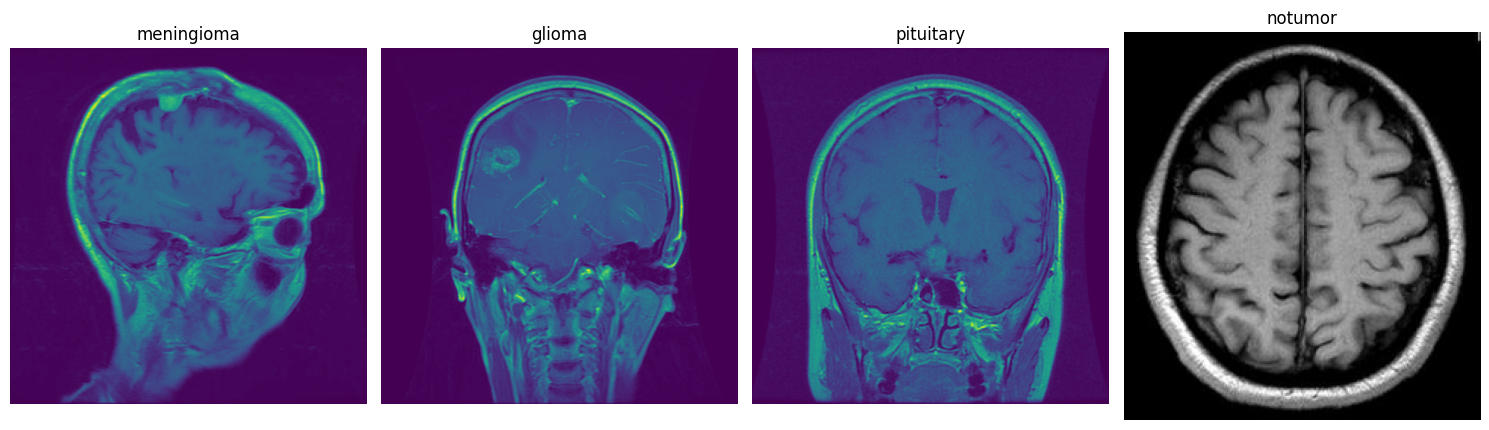

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots(1, len(classes), figsize=(15,5))
for i, cls in enumerate(classes):
    img_file = os.listdir(os.path.join(train_path, cls))[0]
    img_path = os.path.join(train_path, cls, img_file)
    img = mpimg.imread(img_path)
    ax[i].imshow(img)
    ax[i].set_title(cls)
    ax[i].axis('off')
plt.tight_layout()
plt.show()


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [21]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5793 - loss: 0.9947

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.5802 - loss: 0.9930 - val_accuracy: 0.7590 - val_loss: 0.7104
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.8444 - loss: 0.4093 - val_accuracy: 0.7677 - val_loss: 0.6561
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.8874 - loss: 0.3011 - val_accuracy: 0.7748 - val_loss: 0.7224
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.9202 - loss: 0.2264 - val_accuracy: 0.7905 - val_loss: 0.6240
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.9341 - loss: 0.1750 - val_accuracy: 0.8203 - val_loss: 0.6691
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.9593 - loss: 0.1270 - val_accuracy: 0.7949 - val_loss: 0.8305
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.9693 - loss: 0.0953 - val_accuracy: 0.8124 - val_loss: 0.7998
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.9602 - loss: 0.1139 - val_accuracy: 0.805

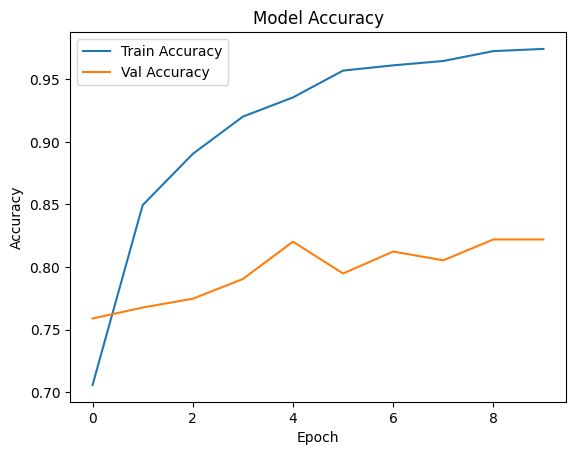

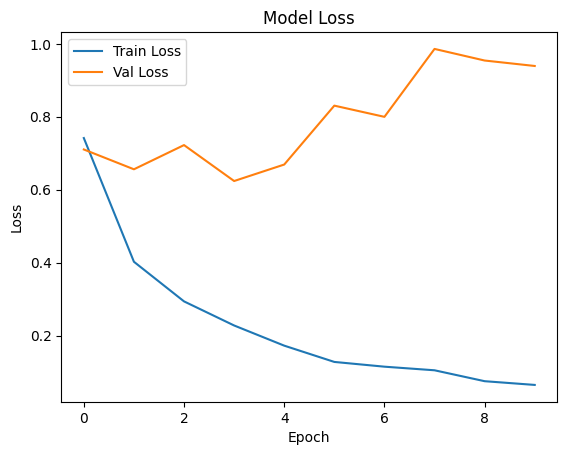

In [23]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


36/36 ━━━━━━━━━━━━━━━━━━━━ 25s 668ms/step


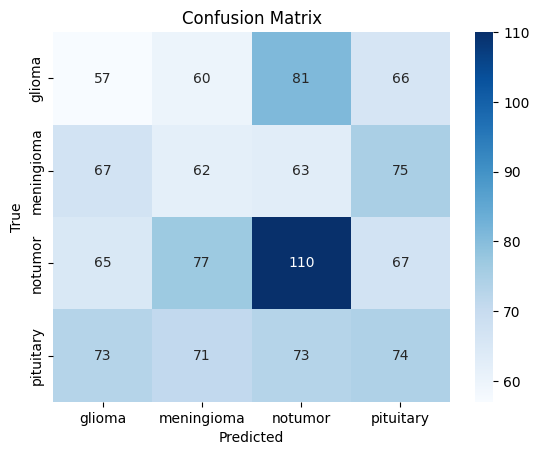

              precision    recall  f1-score   support

      glioma       0.22      0.22      0.22       264
  meningioma       0.23      0.23      0.23       267
     notumor       0.34      0.34      0.34       319
   pituitary       0.26      0.25      0.26       291

    accuracy                           0.27      1141
   macro avg       0.26      0.26      0.26      1141
weighted avg       0.27      0.27      0.27      1141



In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict labels for validation set
val_generator.reset()
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=class_labels))


In [25]:
model.save("brain_tumor_model.h5")
print("✅ Model saved as brain_tumor_model.h5")


✅ Model saved as brain_tumor_model.h5


In [27]:
import os
from PIL import Image

# Show one image from testing folder
test_path = "brain_tumor/Testing/glioma"  # or meningioma, etc.
img_file = os.listdir(test_path)[0]
img_path = os.path.join(test_path, img_file)

# Preview
Image.open(img_path).show()


In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)
predicted_class = list(val_generator.class_indices.keys())[np.argmax(prediction)]
print(f"🧠 Predicted Tumor Type: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
🧠 Predicted Tumor Type: glioma


In [29]:
from google.colab import files
uploaded = files.upload()


Saving az-d007116207262553706.jpg to az-d007116207262553706.jpg


In [30]:
from tensorflow.keras.preprocessing import image

img_path = list(uploaded.keys())[0]  # use uploaded image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)
predicted_class = class_labels[np.argmax(prediction)]
print(f"🧠 Predicted Tumor Type: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
🧠 Predicted Tumor Type: notumor


In [31]:
model.save("brain_tumor_model.h5")


In [32]:
from google.colab import files
files.download("brain_tumor_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>